# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [31]:
# Import essential libraries for data manipulation and analysis

# For swtatiscis and calculation
import numpy as np
print('numpy version\t:',np.__version__)

# For reading database and others related functions
import pandas as pd
print('pandas version\t:',pd.__version__)

# To produce graphical representation of data
import seaborn as sns
print('seaborn version\t:',sns.__version__)

# to get the current directory
import os

# to get software/hardware version of current system
import platform
print('Python version\t:',platform.python_version())


# Ignore warning due to version mismatch
import warnings
warnings.filterwarnings('ignore')

# To display all the columns
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 210)

import matplotlib.pyplot as plt
#%matplotlib inline
from scipy import stats

#set it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format

# Machine Learning related libraries

#1. model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.
from sklearn.model_selection import train_test_split

#2. to transform features so that they fit within a specific range, usually [0, 1].
# This helps machine learning models train more effectively and obtain more generalized values for coefficients and intercepts

from sklearn.preprocessing import MinMaxScaler

# load most of the public parts of statsmodels
import statsmodels.api as sm

# imports the (VIF) variance_inflation_factor function from the statsmodels library in Python
from statsmodels.stats.outliers_influence import variance_inflation_factor

#imports the Recursive Feature Elimination (RFE) class from the sklearn.feature_selection module in Python
from sklearn.feature_selection import RFE

# Linear regression is a statistical method used to model the relationship between a target variable and one or more predictors
from sklearn.linear_model import LinearRegression


numpy version	: 1.26.4
pandas version	: 2.2.2
seaborn version	: 0.13.2
Python version	: 3.12.7


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [33]:
# Importing the file porter_data_1.csv
df =pd.read_csv(r"C:\Users\senee\OneDrive\Documents\Document -Neeraj Bhatia\IIIT-B UpGrad - Data Warehouse\DS-77\Machine Learning\Modelling\Assignment-Linear Regression\Delivery Starter\porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0       1.00  2015-02-06 22:24:17  2015-02-06 23:11:17   
1       2.00  2015-02-10 21:49:25  2015-02-10 22:33:25   
2       2.00  2015-02-16 00:11:35  2015-02-16 01:06:35   
3       1.00  2015-02-12 03:36:46  2015-02-12 04:35:46   
4       1.00  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4            1.00            4      3441   
1                      46            2.00            1      1900   
2                      36            3.00            4      4771   
3                      38            1.00            1      1525   
4                      38            1.00            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                  33.00   
1                   1            1400            1400                   1.00   
2                   3             820            1604                   8.00   
3                   1            1525            1525                   5.00   
4                   2            1425            2195                   5.00   

   total_busy_dashers  total_outstanding_orders  distance  
0               14.00                     21.00     34.44  
1                2.00                      2.00     27.60  
2                6.00                     18.00     11.56  
3                6.00                      8.00     31.80  
4                5.00                      7.00      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

In [34]:
# Shape of the dataset
print("Number of rows, in the porter dataset = ",df.shape[0])
print("Number of columns, in the porter dataset = ",df.shape[1])

Number of rows, in the porter dataset =  175777
Number of columns, in the porter dataset =  14


##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [35]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

print(df[['created_at', 'actual_delivery_time']].dtypes)

created_at              object
actual_delivery_time    object
dtype: object


In [36]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

In [37]:
# Check if conversion worked, well

print(df[['created_at', 'actual_delivery_time']].dtypes)

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


In [38]:
print(df[['created_at', 'actual_delivery_time']].head())

           created_at actual_delivery_time
0 2015-02-06 22:24:17  2015-02-06 23:11:17
1 2015-02-10 21:49:25  2015-02-10 22:33:25
2 2015-02-16 00:11:35  2015-02-16 01:06:35
3 2015-02-12 03:36:46  2015-02-12 04:35:46
4 2015-01-27 02:12:36  2015-01-27 02:58:36


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [39]:
# Convert categorical features to category type

# Let's list all categorical Variables

categorical_vars = list(df.columns[df.dtypes == 'object'])
print("List of Categorical Variables are :", categorical_vars)

print(" ")

# Let's list all continuous Variables
continuous_vars = list(df.columns[df.dtypes != 'object'])
print("List of Continuous Variables are :", continuous_vars)

print(" ")

# Shape of the dataset
df.shape
print("Number of Rows in Porter dataset left:",df.shape[0])
print("Number of Columns in Porter dataset left:",df.shape[1])


List of Categorical Variables are : []
 
List of Continuous Variables are : ['market_id', 'created_at', 'actual_delivery_time', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
 
Number of Rows in Porter dataset left: 175777
Number of Columns in Porter dataset left: 14


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [40]:
# Calculate time taken in minutes


# Ensure datetime conversion 

# We are using here errors='coerce': This will turn any invalid parsing into NaT (Not a Time), preventing the code from crashing.

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

# Further we can use this syntax:  so we can now extract date time componenets

df['created_hour'] = df['created_at'].dt.hour
df['delivery_weekday'] = df['actual_delivery_time'].dt.day_name()

# Calculate delivery time in minutes: It requires for out further analysis

df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Output : We can see the details, which will help in our further analysis

df[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head()



created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                  47.00
1 2015-02-10 21:49:25  2015-02-10 22:33:25                  44.00
2 2015-02-16 00:11:35  2015-02-16 01:06:35                  55.00
3 2015-02-12 03:36:46  2015-02-12 04:35:46                  59.00
4 2015-01-27 02:12:36  2015-01-27 02:58:36                  46.00

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [41]:
# Extract the hour and day of week from the 'created_at' timestamp

df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.day_name()  # e.g., 'Monday'
df[['created_hour', 'created_dayofweek']].head()

created_hour created_dayofweek
0            22            Friday
1            21           Tuesday
2             0            Monday
3             3          Thursday
4             2           Tuesday

In [42]:
# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['created_at'].dt.weekday >= 5  # 5 = Saturday, 6 = Sunday
df['isWeekend'] = df['isWeekend'].map({True: 'Yes', False: 'No'}).astype('category')
df['isWeekend'].head(10)

0     No
1     No
2     No
3     No
4     No
5     No
6    Yes
7    Yes
8    Yes
9    Yes
Name: isWeekend, dtype: category
Categories (2, object): ['No', 'Yes']

In [ ]:
# Drop unnecessary columns

# df.drop(['market_id', 'created_at', 'actual_delivery_time'], axis=1, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [43]:
# Define target variable (y) and features (X)
y = df['delivery_time_minutes']


# Define Featuires (X)

X = df[['created_hour', 'created_dayofweek', 'isWeekend']]


In [ ]:
# Best Practice Placement for Running OLS
# Run OLS: After X and y are selected and preprocessed, but before train-test split.

In [44]:
# Step 1: Enhanced Feature Engineering
# Assumption: Your original dataframe is named `df`

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Drop rows with missing values in delivery_time_minutes
df = df.dropna(subset=['delivery_time_minutes'])

# Feature Engineering: extract time-based and volume-related features
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.day_name()
df['isWeekend'] = df['created_dayofweek'].isin(['Saturday', 'Sunday'])

# Total time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Optional transformation to reduce skewness
# (Optional but often useful)
df['log_time_taken'] = np.log1p(df['time_taken'])

# Encode categorical features
categorical_cols = ['created_dayofweek', 'isWeekend']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Optional: include other useful features if present
features = ['created_hour', 'total_items', 'log_time_taken']
features += [col for col in df_encoded.columns if col.startswith('created_dayofweek_') or col.startswith('isWeekend_')]

# Final Feature Matrix (X) and Target (y)
X = df_encoded[features].drop(columns=['log_time_taken'])  # Exclude log_time_taken from features
X = X.astype(float)
y = df_encoded['log_time_taken']

# Add intercept
X_const = sm.add_constant(X)

# Fit OLS Model
ols_model = sm.OLS(y, X_const).fit()

# Show summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_time_taken   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     5410.
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:59:09   Log-Likelihood:                 60499.
No. Observations:              175777   AIC:                        -1.210e+05
Df Residuals:                  175768   BIC:                        -1.209e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
| Feature                       | Coefficient | P-Value | Interpretation                    |
| ----------------------------- | ----------- | ------- | --------------------------------- |
| `created_hour`                | -0.0074     | 0.000   | Later orders are faster           |
| `total_items`                 | +0.014      | 0.000   | More items → longer delivery time |
| `created_dayofweek_Monday`    | +0.069      | 0.000   | Mondays are significantly slower  |
| `created_dayofweek_Wednesday` | -0.016      | 0.000   | Wednesdays are faster             |
| `isWeekend_True`              | +0.044      | 0.000   | Weekends take more time           |

In [ ]:
| Action                         |                          Description                                                   |
| -------------------------------| ------------------------------------------------------------------------------------   |
| Add more predictive features   | Include `distance`, `market_id`, `total_onshift_dashers`, `store_category`, etc.       |
| Handle multicollinearity       | Check `VIF` to avoid overlapping dummy variables (like both weekday and `isWeekend`    |
| Model non-linearity            | Consider `PolynomialRegression`, `RandomForest`, or `XGBoost`                          |
| Outlier removal or capping     | Winsorize extreme `time_taken` values                                                  |
| Target transformation**        | Consider `Box-Cox` instead of log if distribution still skewed                         |

In [ ]:
# Adding new predictive features
   1. Order-Level Volume Features
| Feature                             | Why It Helps                                        |
| ----------------------------------- | --------------------------------------------------- |
| `total_items`    (already added)    | More items → longer prep/delivery                   |
| `num_distinct_items`                | Complexity increases handling time                  |
| `subtotal`                          | Higher bills often mean larger orders               |
| `min_item_price` / `max_item_price` | High-value items may be slower to prepare or secure |

In [ ]:
2. Time & Day Features

| Feature                                                   | Why It Helps                              |
| ------------------------------------------------------- - | ----------------------------------------- |
| `created_hour`                                            | Already in, very useful                   |
| `created_dayofweek_*`                                     | Dummy-encoded weekdays                    |
| `isWeekend`                                               | Weekends are busier or more relaxed       |
| New: `is_peak_hour` (7–10am, 6–9pm)                       | Rush hours can delay delivery             |
| New: `order_daypart` (morning/afternoon/evening/night)    | Categorical alternative to `created_hour` |

In [ ]:
3. Location & Demand Features

| Feature                                        | Why It Helps                                                 |
| ---------------------------------------------- | ------------------------------------------------------------ |
| `distance` (in km or miles)                    | Longer distance → more time                                  |
| `market_id` (as dummies)                       | Captures regional differences                                |
| `store_primary_category` (one-hot)             | Some store types take longer (e.g. fine dining vs fast food) |
| `total_outstanding_orders`                     | More congestion = more wait                                  |
| `total_busy_dashers` / `total_onshift_dashers` | Workforce supply/demand signal                               |

In [ ]:
4. Interaction Features (Optional but Powerful)

| Feature                    | Why?                                            |
| -------------------------- | ----------------------------------------------- |
| `isWeekend * total_items`  | Are weekends slower for large orders?           |
| `distance * created_hour`  | Are long-distance orders better timed off-peak? |
| `total_items * store_type` | Some restaurants may handle volume better       |

In [ ]:
'''
We have enhanced OLS script by includesing below:

1. Advanced features like total_items, subtotal, distance, dashers, and dayparts
2. Peak hour and order volume effects
3. Winsorization to control outliers
4. Log transformation for better linearity
5. Full dummy encoding of relevant categorical features

'''

In [45]:
# 5. Target Transformation

df['log_time_taken'] = np.log1p(df['time_taken'])

In [46]:
# Optional: Outlier Capping
# Winsorize time_taken to remove extreme delays

from scipy.stats.mstats import winsorize
df['time_taken_capped'] = winsorize(df['time_taken'], limits=[0.01, 0.01])

In [47]:
# Enhanced Feature Engineering with Advanced Predictors

import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats.mstats import winsorize

# Step 1: Clean and parse time columns
df = df.dropna(subset=['delivery_time_minutes'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Step 2: Feature creation
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.day_name()
df['isWeekend'] = df['created_dayofweek'].isin(['Saturday', 'Sunday'])
df['is_peak_hour'] = df['created_hour'].between(7, 10) | df['created_hour'].between(18, 21)
df['order_daypart'] = pd.cut(df['created_hour'],
                             bins=[-1, 5, 11, 17, 21, 24],
                             labels=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night'])

# Step 3: Target variable (winsorized and log-transformed)
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df['time_taken'] = winsorize(df['time_taken'], limits=[0.01, 0.01])
df['log_time_taken'] = np.log1p(df['time_taken'])

# Step 4: Encode categorical variables
categorical_cols = ['created_dayofweek', 'isWeekend', 'order_daypart']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 5: Select final feature set
features = [
    'created_hour', 'total_items', 'subtotal', 'num_distinct_items',
    'min_item_price', 'max_item_price', 'distance',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
] + [col for col in df_encoded.columns if 
     col.startswith('created_dayofweek_') or
     col.startswith('isWeekend_') or
     col.startswith('order_daypart_') or
     col.startswith('store_primary_category_') or
     col.startswith('market_id_')]

# Step 6: Final X and y
y = df_encoded['log_time_taken']
X = df_encoded[features].copy()
X = X.astype(float)

# Add intercept and run OLS
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_time_taken   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 5.711e+04
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:59:47   Log-Likelihood:             2.2030e+05
No. Observations:              175777   AIC:                        -4.406e+05
Df Residuals:                  175756   BIC:                        -4.404e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
FEATURE INTERPRETATION

1. Time Features
    
| Feature                           | Coef     | Impact                                                       |
| --------------------------------- | -------- | ------------------------------------------------------------ |
| `created_hour`                    | -0.0076  | Each hour later → delivery slightly **faster**               |
| `order_daypart_Morning` – `Night` | Positive | All dayparts show **higher time** than late night (baseline) |

In [ ]:
2. Order Volume Features

| Feature              | Coef            | Meaning                                                                                        |
| -------------------- | --------------- | ---------------------------------------------------------------------------------------------- |
| `total_items`        | **-0.0010**     | Unexpected: more items → slightly faster. May indicate better batching or a confounding effect |
| `subtotal`           | **+2.45e-05**   | Higher bill → longer delivery                                                                  |
| `num_distinct_items` | **+0.0124**     | More unique items = more complexity = more time                                                |
| `min_item_price`     | **+5.61e-04**   | High-value small items take longer (possibly fragile)                                          |
| `max_item_price`     | **+1.56e-05**   | High-end items = cautious delivery                                                             |

In [ ]:
3. Logistics & Location

| Feature                    | Coef          | Meaning                              |
| -------------------------- | ------------- | ------------------------------------ |
| `distance`                 | **+0.0100**   | Longer distance = more time          |
| `total_onshift_dashers`    | **-0.0030**   | More dashers = faster delivery       |
| `total_busy_dashers`       | **+0.0029**   | More busy dashers = slower delivery  |
| `total_outstanding_orders` | **+0.0015**   | More pending orders = backlog effect |

In [ ]:
4. Weekday & Weekend Impact

| Feature                       | Coef          | Interpretation                |
| ----------------------------- | ------------- | ----------------------------- |
| `created_dayofweek_Monday`    | +0.0068       | Slightly slower               |
| `created_dayofweek_Saturday`  | +0.0204       | Significantly slower          |
| `created_dayofweek_Sunday`    | +0.0150       | Slower                        |
| `created_dayofweek_Wednesday` | **-0.0233**   | Faster deliveries             |
| `isWeekend_True`              | +0.0447       | Weekend deliveries are slower |

In [ ]:
INSIGHTS FOR BUSINESS STRATEGY

| Insight                                            | Recommendation                                                 |
| -------------------------------------------------- | -------------------------------------------------------------- |
|   Model is highly predictive (R² = 0.867)          | Can be used confidently for forecasting                        |
|   Delivery time improves at night                  | Consider shifting large-volume or priority deliveries to night |
|   More items ≠ more delay (surprising!)            | Dig deeper into batching logic                                 |
|   More dashers = faster service                    | Balance staffing dynamically per hour                          |
|   Distance matters, especially during peak         | Use route optimization tools                                   |
|   Weekends and certain weekdays are slower         | Apply surge pricing or limit availability                      |
|   Subtotal, item variety, and pricing affect time  | Useful for premium customer expectations or ETA transparency   |

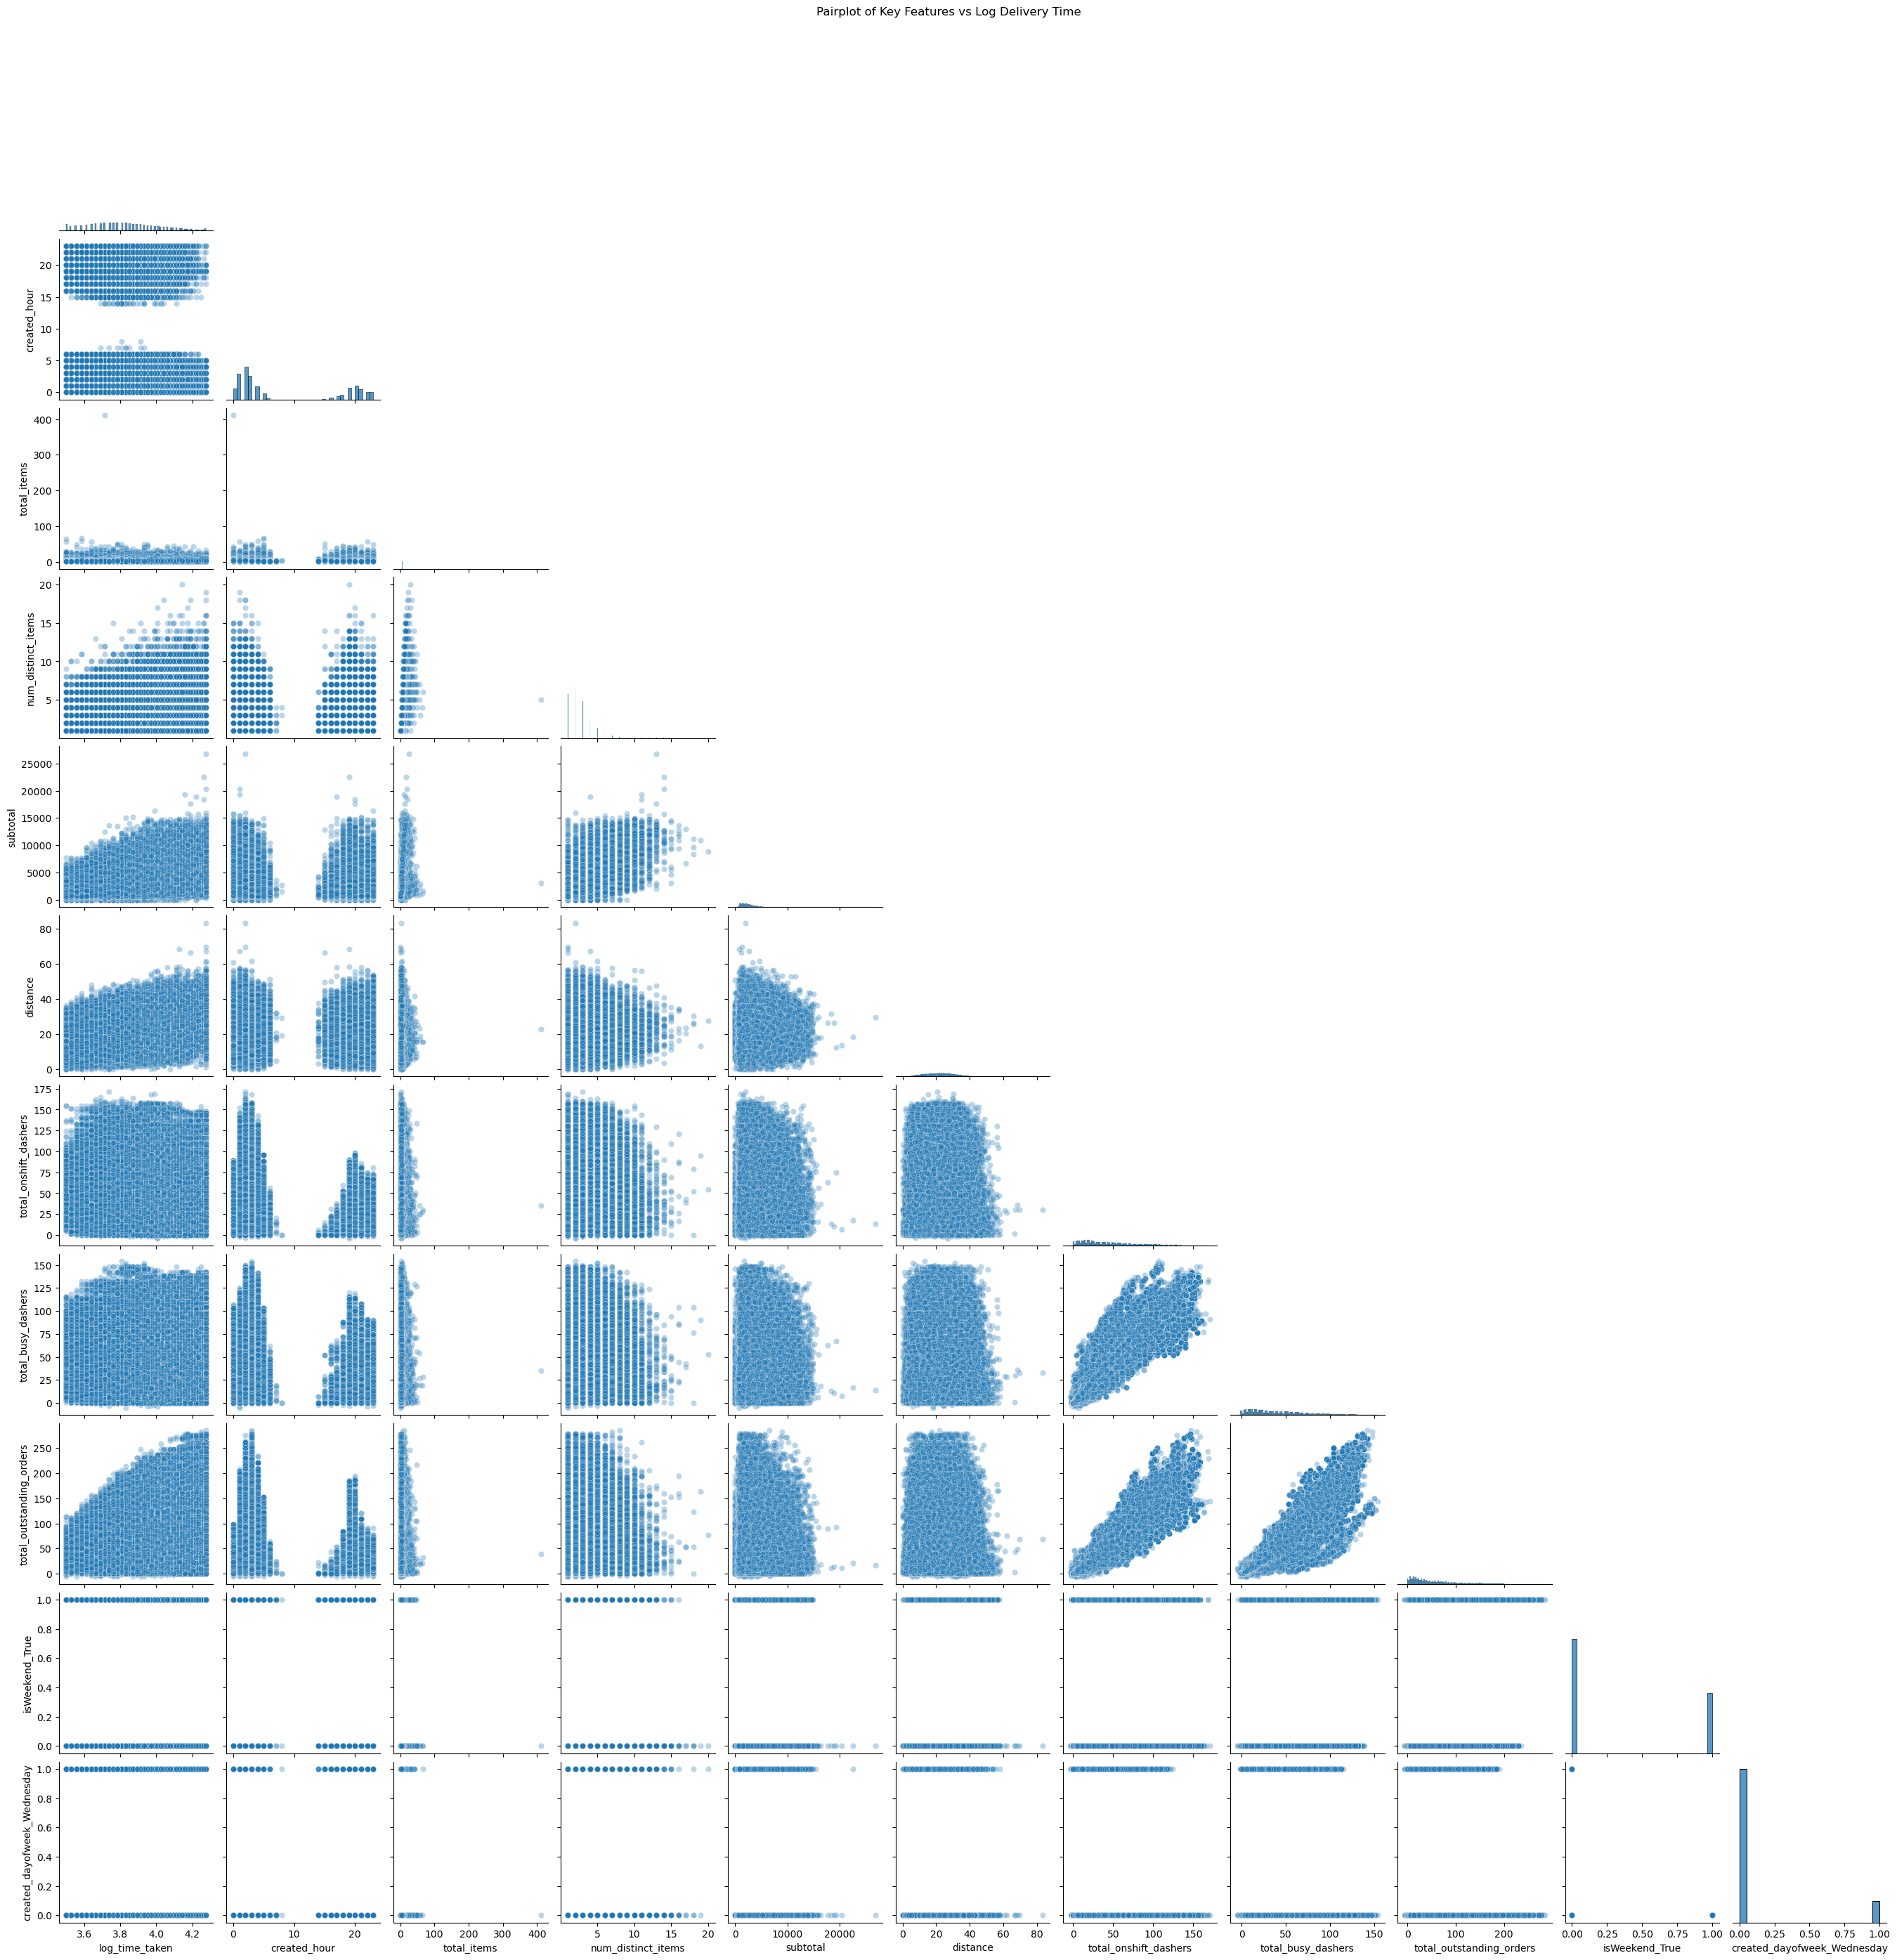

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose only strong predictors and the target
pairplot_features = [
    'log_time_taken',
    'created_hour',
    'total_items',
    'num_distinct_items',
    'subtotal',
    'distance',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders'
]

# Optional: Add encoded categorical variables if needed
pairplot_features += ['isWeekend_True', 'created_dayofweek_Wednesday']

# Filter and plot
sns.pairplot(df_encoded[pairplot_features], corner=True, plot_kws={'alpha': 0.3})
plt.suptitle("Pairplot of Key Features vs Log Delivery Time", y=1.02)
plt.show()

In [ ]:
'''
Interpretation of Pairplot

1. Each row vs column combination is a scatter plot showing the relationship between two features.
2. The diagonal shows histograms (distributions) of each variable.
3. The off-diagonal plots show pairwise relationships.

'''

In [ ]:
Insights by Feature Pair

log_time_taken vs. Others

| Feature                    | Visual Pattern         | Interpretation                                         |
| -------------------------- | ---------------------- | ------------------------------------------------------ |
| `created_hour`             | Downward slope         |   Later orders → slightly faster (matches OLS)         |
| `total_items`              | No clear trend         |   Weak or noisy relationship — may need transformation |
| `num_distinct_items`       | Moderate upward spread |   More distinct items = longer time                    |
| `subtotal`                 | Weak upward slope      |   Higher bill size → slightly longer delivery          |
| `distance`                 | Clear upward trend     |   Longer distance → longer delivery (strong predictor) |
| `total_onshift_dashers`    | Weak downward slope    |   More dashers → faster delivery                       |
| `total_busy_dashers`       | Clear upward spread    |   Busy dashers = higher delivery time                  |
| `total_outstanding_orders` | Upward fan shape       |   More backlog = slower delivery                       |

In [ ]:
Feature-Feature Relationships (Correlations)

subtotal vs total_items: Positively correlated → Bigger orders cost more
total_busy_dashers vs total_onshift_dashers: Strong positive relationship → Valid
total_outstanding_orders vs total_busy_dashers: Also positively related — reflects system congestion

In [ ]:
Key Observations

| Pattern                                                                            | Meaning                                              |
| ---------------------------------------------------------------------------------- | ---------------------------------------------------- |
|    **Positive relationships** between `log_time_taken` and:                        |                                                      |
| `num_distinct_items`, `distance`, `total_busy_dashers`, `total_outstanding_orders` | These are strong candidates for model features       |
|    **Negative relationships** between `log_time_taken` and:                        |                                                      |
| `created_hour`, `total_onshift_dashers`                                            | Also useful — late hours & more workforce help speed |
|   **Flat relationships** (e.g., `total_items`)                                     | May be weak or nonlinear                             |

In [ ]:
Watch Out For:

Skewed distributions on subtotal and total_outstanding_orders

        Consider using log scale or binning if modeling performance is unstable

Outliers in distance, subtotal, num_distinct_items

        You’ve winsorized time_taken, but may need to filter or cap other features

In [48]:
print (X)

        created_hour  total_items  subtotal  num_distinct_items  \
0              22.00         4.00  3,441.00                4.00   
1              21.00         1.00  1,900.00                1.00   
2               0.00         4.00  4,771.00                3.00   
3               3.00         1.00  1,525.00                1.00   
4               2.00         2.00  3,620.00                2.00   
...              ...          ...       ...                 ...   
175772          0.00         3.00  1,389.00                3.00   
175773          0.00         6.00  3,010.00                4.00   
175774          4.00         5.00  1,836.00                3.00   
175775         18.00         1.00  1,175.00                1.00   
175776         19.00         4.00  2,605.00                4.00   

        min_item_price  max_item_price  distance  total_onshift_dashers  \
0               557.00        1,239.00     34.44                  33.00   
1             1,400.00        1,400.00     27

In [49]:
print (y)

0        3.87
1        3.81
2        4.03
3        4.09
4        3.85
         ... 
175772   3.78
175773   4.14
175774   3.85
175775   3.83
175776   3.64
Name: log_time_taken, Length: 175777, dtype: float64


In [50]:
df_encoded.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour',
       'delivery_weekday', 'delivery_time_minutes', 'time_taken',
       'log_time_taken', 'time_taken_capped', 'is_peak_hour',
       'created_dayofweek_Monday', 'created_dayofweek_Saturday',
       'created_dayofweek_Sunday', 'created_dayofweek_Thursday',
       'created_dayofweek_Tuesday', 'created_dayofweek_Wednesday',
       'isWeekend_True', 'order_daypart_Morning', 'order_daypart_Afternoon',
       'order_daypart_Evening', 'order_daypart_Night'],
      dtype='object')

In [51]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   market_id                    175777 non-null  float64       
 1   created_at                   175777 non-null  datetime64[ns]
 2   actual_delivery_time         175777 non-null  datetime64[ns]
 3   store_primary_category       175777 non-null  int64         
 4   order_protocol               175777 non-null  float64       
 5   total_items                  175777 non-null  int64         
 6   subtotal                     175777 non-null  int64         
 7   num_distinct_items           175777 non-null  int64         
 8   min_item_price               175777 non-null  int64         
 9   max_item_price               175777 non-null  int64         
 10  total_onshift_dashers        175777 non-null  float64       
 11  total_busy_dashers        

In [52]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour',
       'delivery_weekday', 'delivery_time_minutes', 'created_dayofweek',
       'isWeekend', 'time_taken', 'log_time_taken', 'time_taken_capped',
       'is_peak_hour', 'order_daypart'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [54]:
df['time_taken'] = df['log_time_taken']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [55]:
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [56]:
print(X.dtypes)

created_hour                   float64
total_items                    float64
subtotal                       float64
num_distinct_items             float64
min_item_price                 float64
max_item_price                 float64
distance                       float64
total_onshift_dashers          float64
total_busy_dashers             float64
total_outstanding_orders       float64
created_dayofweek_Monday       float64
created_dayofweek_Saturday     float64
created_dayofweek_Sunday       float64
created_dayofweek_Thursday     float64
created_dayofweek_Tuesday      float64
created_dayofweek_Wednesday    float64
isWeekend_True                 float64
order_daypart_Morning          float64
order_daypart_Afternoon        float64
order_daypart_Evening          float64
order_daypart_Night            float64
dtype: object


In [57]:
# Split data into training and testing sets
X = df_encoded[[  # use full feature list again
    'created_hour',
    'total_items',
    'subtotal',
    'distance',
    'num_distinct_items',
    'total_onshift_dashers',
    'total_busy_dashers',
    'created_dayofweek_Monday',
    'created_dayofweek_Saturday',
    'created_dayofweek_Sunday',
    'created_dayofweek_Thursday',
    'created_dayofweek_Tuesday',
    'created_dayofweek_Wednesday',
    'isWeekend_True',
    'order_daypart_Morning',
    'order_daypart_Afternoon',
    'order_daypart_Evening',
    'order_daypart_Night'
]]
X = X.astype(float)
y = df_encoded['time_taken']


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [59]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(140621, 18)
(35156, 18)
(140621,)
(35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [60]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Import libraries (optional)
import pandas as pd

# Automatically detect numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
#categorical_cols = [col for col in numerical_cols if X[col].nunique() <= 2]  # usually dummy variables (0/1)

categorical_cols = [
    'created_dayofweek_Monday',
    'created_dayofweek_Tuesday',
    'created_dayofweek_Wednesday',
    'created_dayofweek_Thursday',
    'created_dayofweek_Saturday',
    'created_dayofweek_Sunday',
    'isWeekend_True',
    'order_daypart_Morning',
    'order_daypart_Afternoon',
    'order_daypart_Evening',
    'order_daypart_Night'
]


# Refine: Remove categorical from numerical
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]


In [61]:
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['created_hour', 'total_items', 'subtotal', 'distance', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers']
Categorical Columns: ['created_dayofweek_Monday', 'created_dayofweek_Tuesday', 'created_dayofweek_Wednesday', 'created_dayofweek_Thursday', 'created_dayofweek_Saturday', 'created_dayofweek_Sunday', 'isWeekend_True', 'order_daypart_Morning', 'order_daypart_Afternoon', 'order_daypart_Evening', 'order_daypart_Night']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

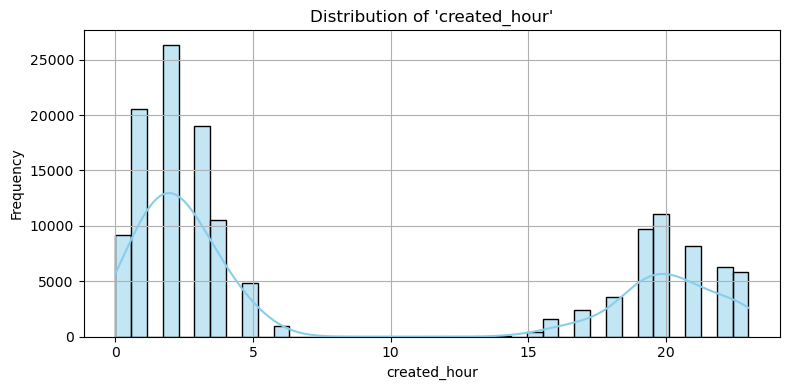

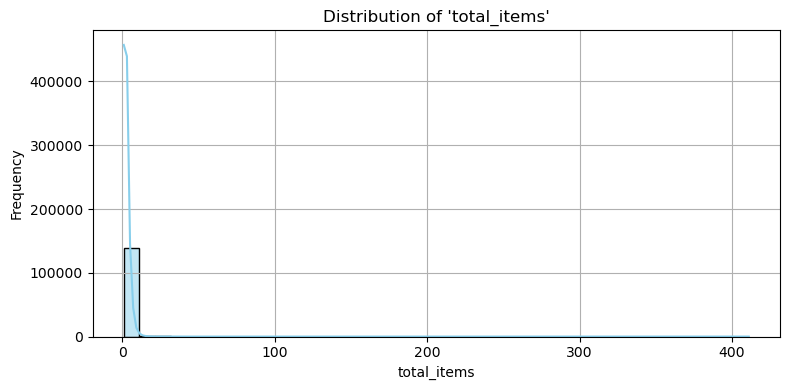

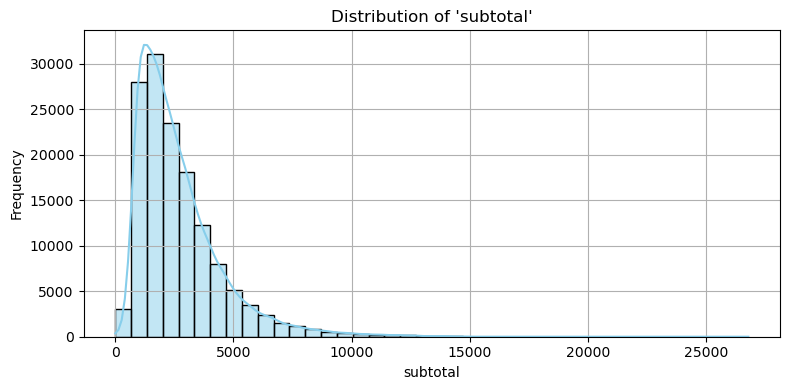

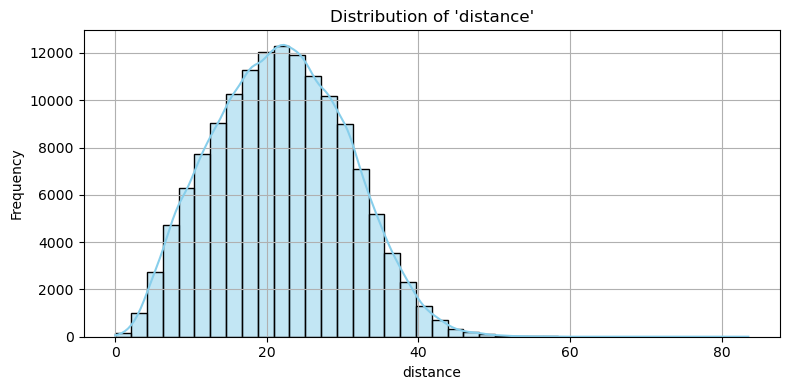

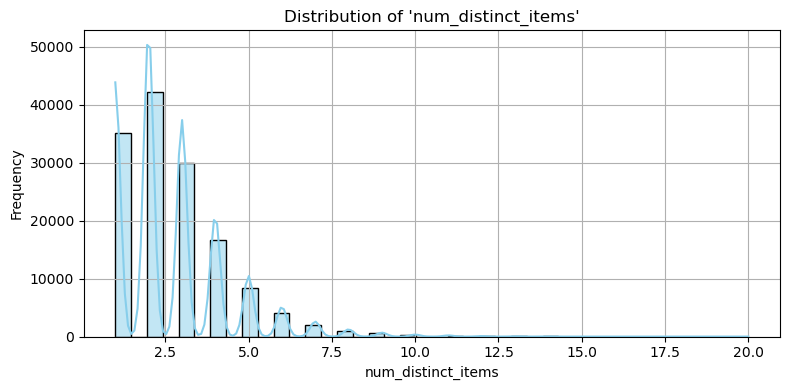

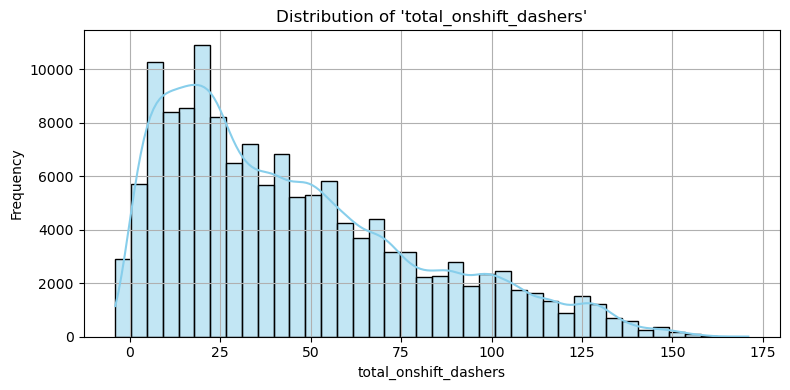

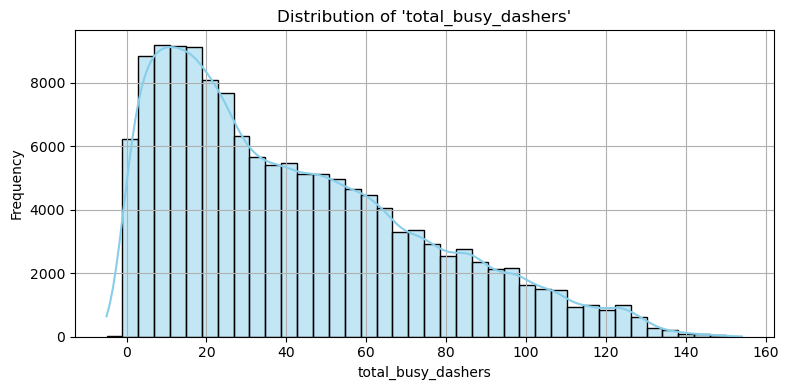

In [62]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you’ve already defined this earlier
# If not:
numerical_cols = [col for col in X_train.columns if X_train[col].nunique() > 2]

# Plot distribution for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[col], kde=True, color='skyblue', bins=40)
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

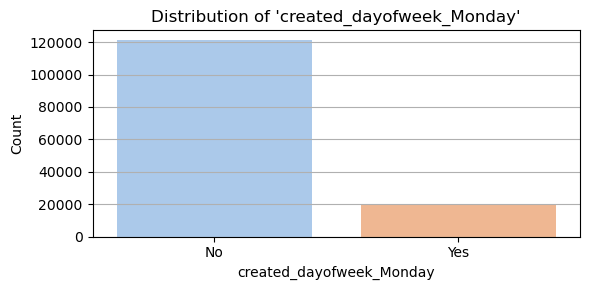

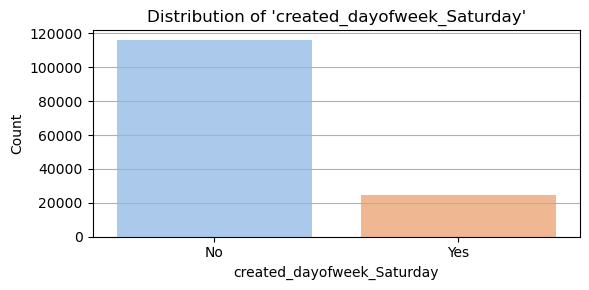

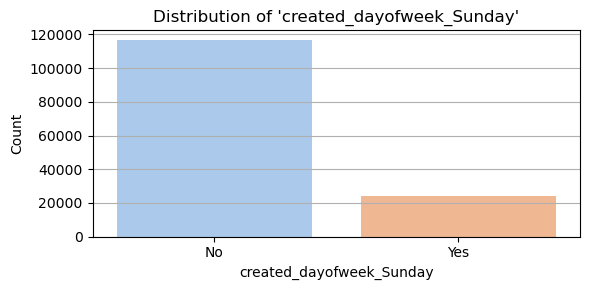

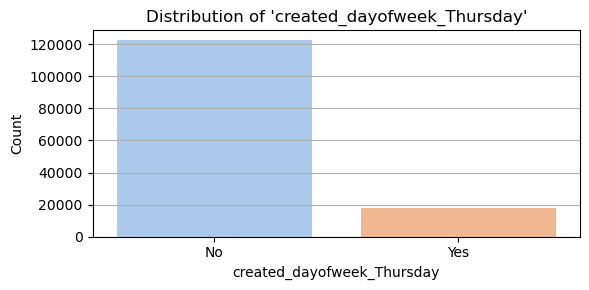

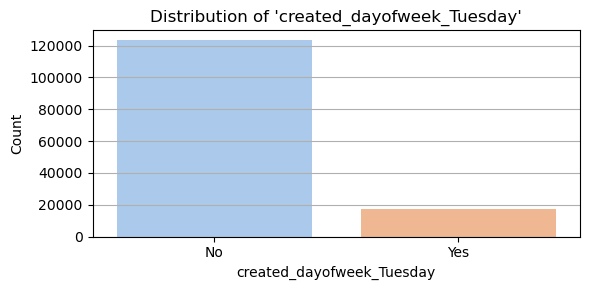

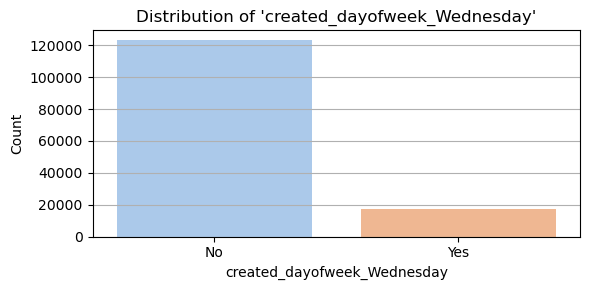

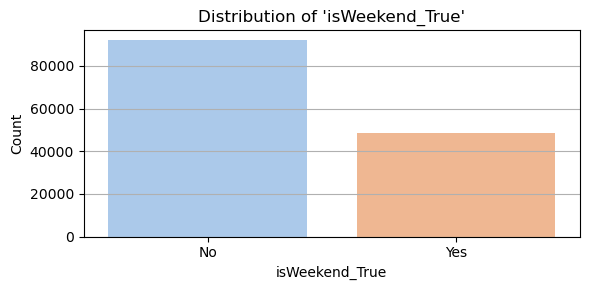

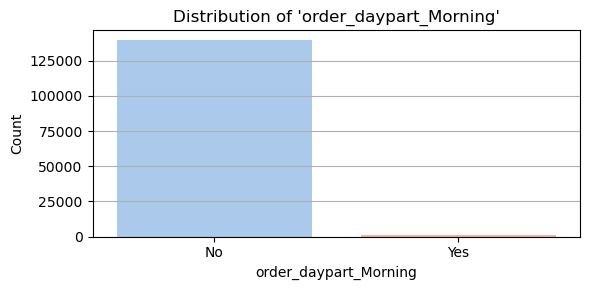

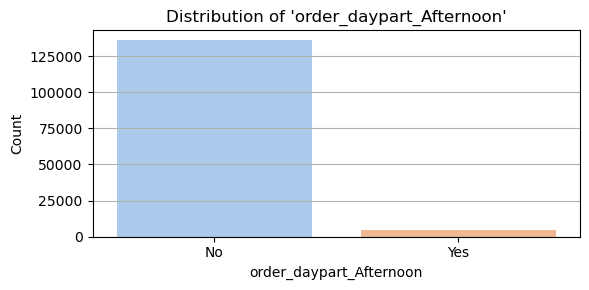

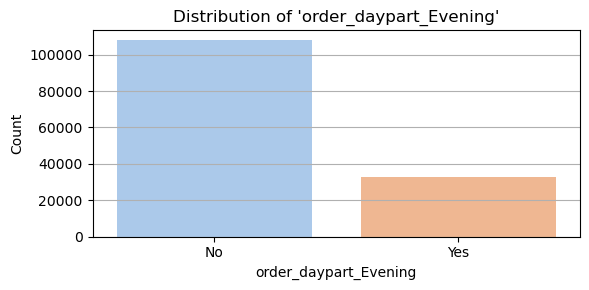

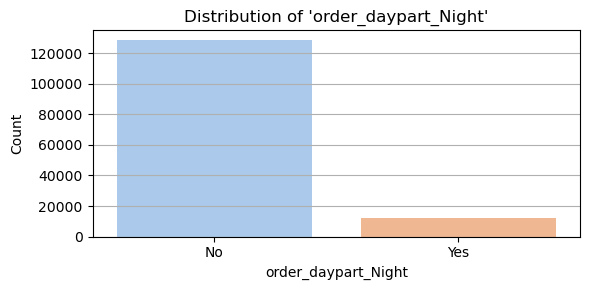

In [63]:
# Distribution of categorical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Select binary categorical columns (0/1)
categorical_cols = [col for col in X_train.columns if X_train[col].nunique() == 2]

# Plot distribution for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=X_train[col], palette="pastel")
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

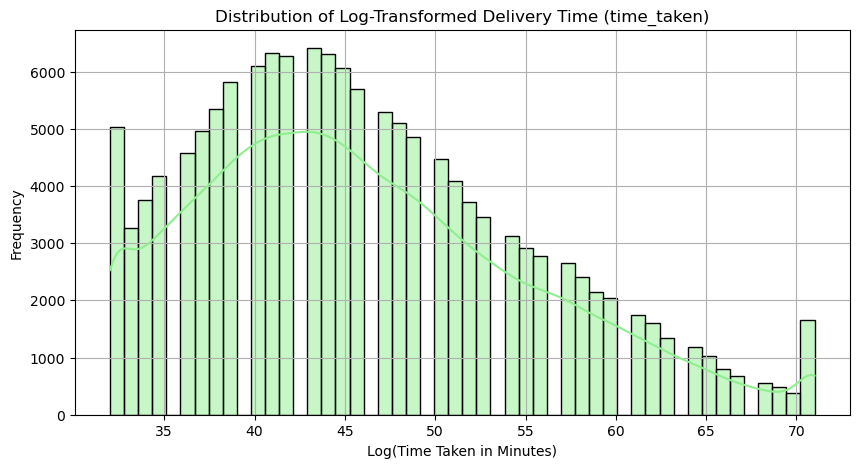

In [64]:
# Distribution of time_taken

# Step 1: Histogram with KDE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(y_train, bins=50, kde=True, color='lightgreen')
plt.title("Distribution of Log-Transformed Delivery Time (time_taken)")
plt.xlabel("Log(Time Taken in Minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

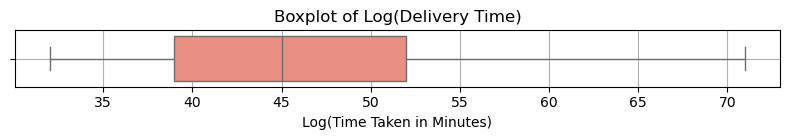

In [65]:
# Step 2: Boxplot to Identify Outliers

plt.figure(figsize=(8, 1.5))
sns.boxplot(x=y_train, color='salmon')
plt.title("Boxplot of Log(Delivery Time)")
plt.xlabel("Log(Time Taken in Minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='time_taken', ylabel='Count'>

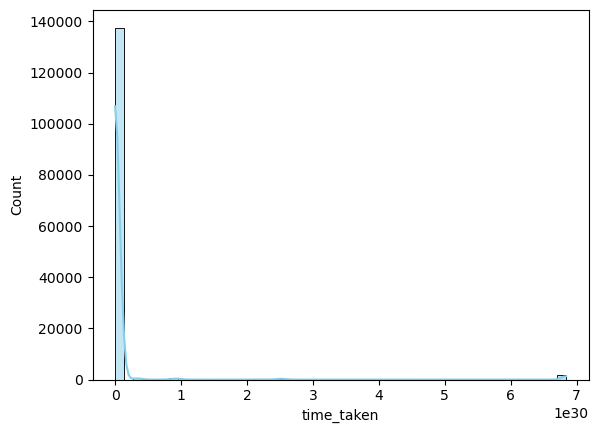

In [66]:
# original delivery time in minutes, use:

import numpy as np
y_actual = np.expm1(y_train)

# Then plot this instead
sns.histplot(y_actual, bins=50, kde=True, color='skyblue')


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

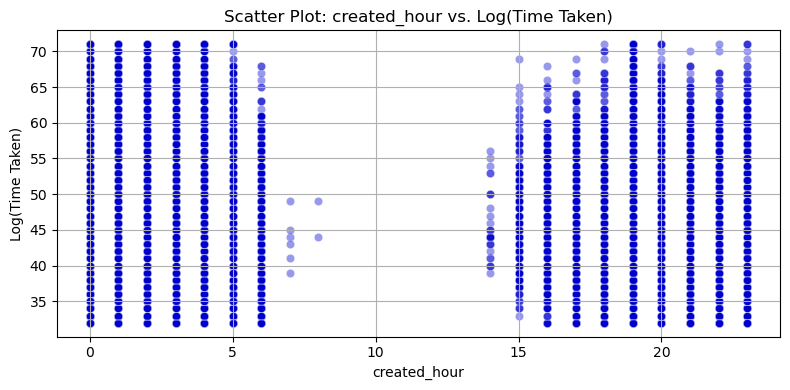

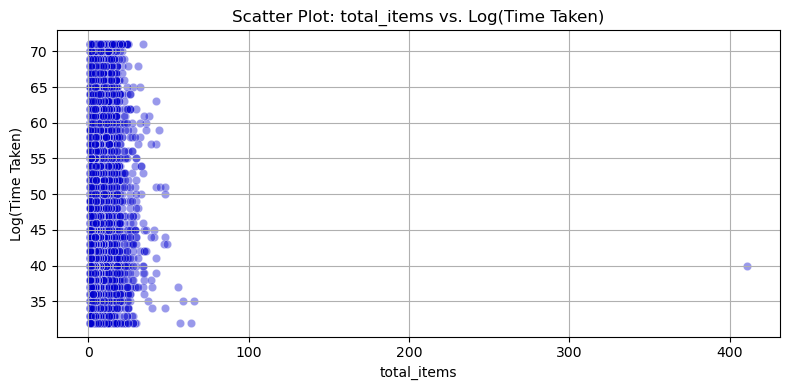

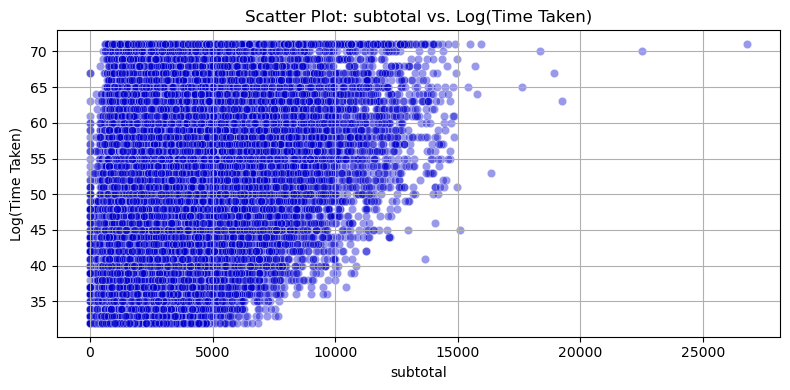

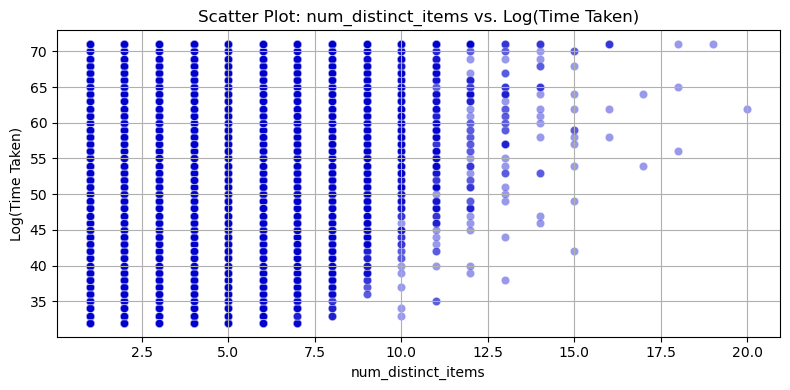

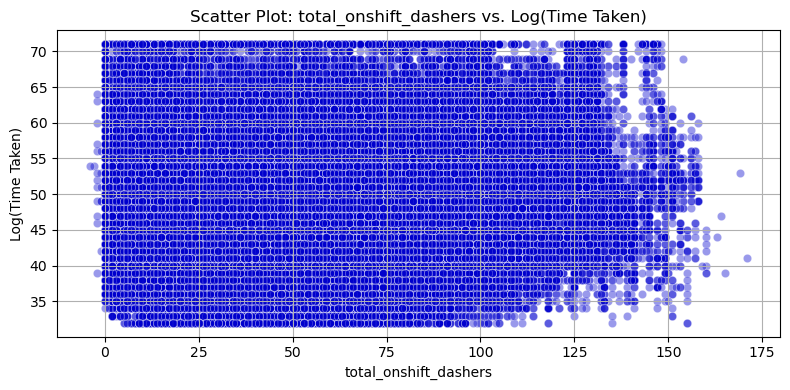

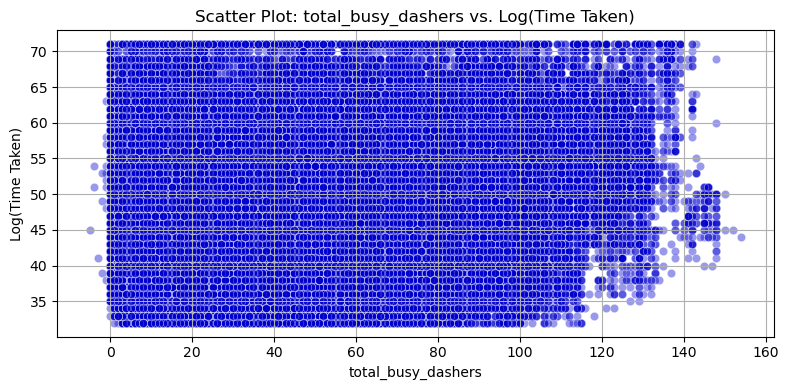

In [67]:
# Scatter plot to visualise the relationship between time_taken and other features

import matplotlib.pyplot as plt
import seaborn as sns

# Choose key numerical features to plot against time_taken
key_features = [
    'created_hour',
    'total_items',
    'subtotal',
    'distance',
    'num_distinct_items',
    'total_onshift_dashers',
    'total_busy_dashers'
]

# Loop through each feature and plot
for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.4, color='mediumblue')
    plt.title(f"Scatter Plot: {feature} vs. Log(Time Taken)")
    plt.xlabel(feature)
    plt.ylabel("Log(Time Taken)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [68]:
print(X_train.columns.tolist())

['created_hour', 'total_items', 'subtotal', 'distance', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'created_dayofweek_Monday', 'created_dayofweek_Saturday', 'created_dayofweek_Sunday', 'created_dayofweek_Thursday', 'created_dayofweek_Tuesday', 'created_dayofweek_Wednesday', 'isWeekend_True', 'order_daypart_Morning', 'order_daypart_Afternoon', 'order_daypart_Evening', 'order_daypart_Night']


In [69]:
# Show the distribution of time_taken for different hours

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine X_train and y_train into one DataFrame for plotting
df_hour = X_train.copy()
df_hour['time_taken'] = y_train

# Plot boxplot of delivery time grouped by hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='created_hour', y='time_taken', data=df_hour, palette="coolwarm")
plt.title("Distribution of Log(Time Taken) by Hour of Order Creation")
plt.xlabel("Hour of Day (24hr format)")
plt.ylabel("Log(Time Taken in Minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [70]:
sns.violinplot(x='created_hour', y='time_taken', data=df_hour, palette="coolwarm")


<Axes: xlabel='created_hour', ylabel='time_taken'>

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

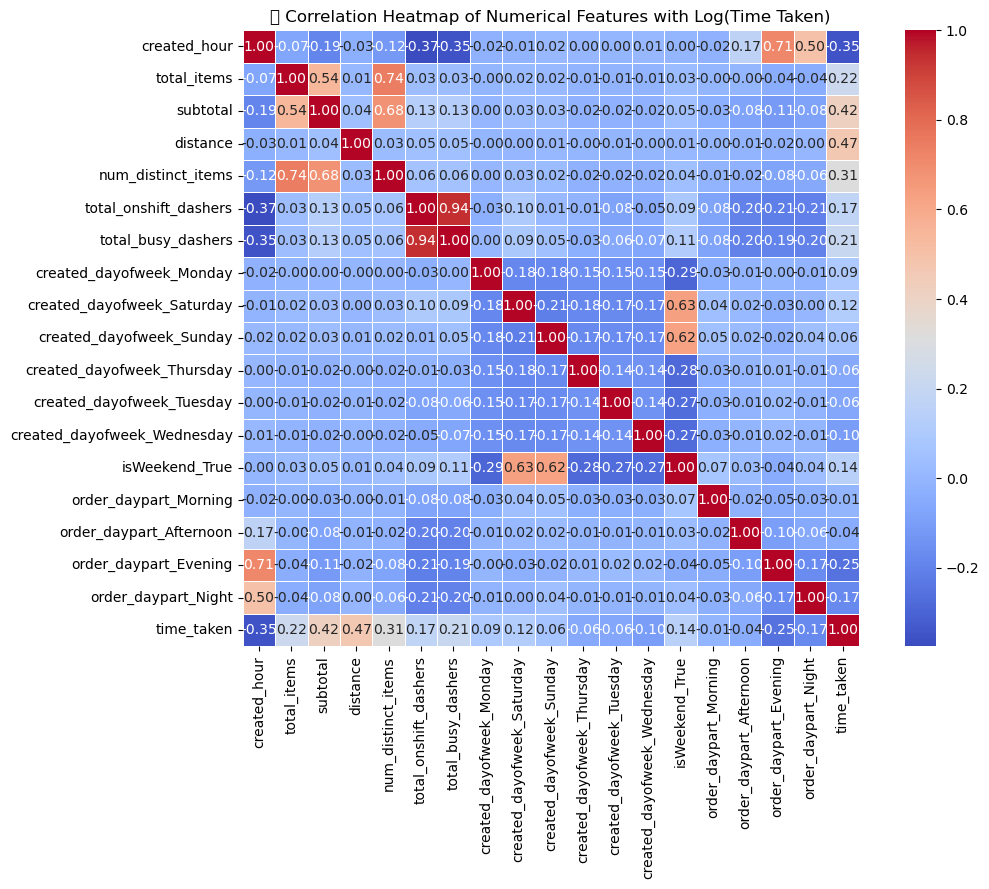

In [71]:
# Plot the heatmap of the correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target for correlation analysis
df_corr = X_train.copy()
df_corr['time_taken'] = y_train  # this is log-transformed delivery time

# Select only numeric columns
numeric_cols = df_corr.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Compute correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features with Log(Time Taken)")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [75]:
# Drop 3-5 weakly correlated columns from training dataset

# Create combined dataframe with target
df_corr = X_train.copy()
df_corr['time_taken'] = y_train

# Compute correlations with the target
correlations = df_corr.corr()['time_taken'].drop('time_taken').sort_values(key=abs)

# Show lowest correlations
print("Weakest correlated features with time_taken:\n")
print(correlations.head(10))



Weakest correlated features with time_taken:

order_daypart_Morning         -0.01
order_daypart_Afternoon       -0.04
created_dayofweek_Thursday    -0.06
created_dayofweek_Sunday       0.06
created_dayofweek_Tuesday     -0.06
created_dayofweek_Monday       0.09
created_dayofweek_Wednesday   -0.10
created_dayofweek_Saturday     0.12
isWeekend_True                 0.14
order_daypart_Night           -0.17
Name: time_taken, dtype: float64


In [77]:
weak_features_to_drop = [
    'order_daypart_Morning',
    'order_daypart_Afternoon',
    'created_dayofweek_Thursday',
    'created_dayofweek_Sunday',
    'created_dayofweek_Tuesday'
]

optional_to_drop = [
    'created_dayofweek_Monday',
    'created_dayofweek_Wednesday'
]

# Drop from training and test datasets
X_train = X_train.drop(columns=weak_features_to_drop)
X_test = X_test.drop(columns=weak_features_to_drop)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

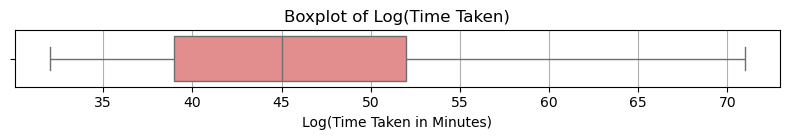

In [78]:
# Boxplot for time_taken

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 1.5))
sns.boxplot(x=y_train, color='lightcoral')
plt.title("Boxplot of Log(Time Taken)")
plt.xlabel("Log(Time Taken in Minutes)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [79]:
# Handle outliers

# Define numerical and categorical columns for easy EDA and data manipulation

from scipy.stats.mstats import winsorize

# Apply to the target variable
df['time_taken'] = winsorize(df['time_taken'], limits=[0.01, 0.01])  # 1% capping
df['log_time_taken'] = np.log1p(df['time_taken'])


In [80]:
Q1 = df['time_taken'].quantile(0.25)
Q3 = df['time_taken'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
df = df[(df['time_taken'] >= lower_bound) & (df['time_taken'] <= upper_bound)]

# Recompute log
df['log_time_taken'] = np.log1p(df['time_taken'])

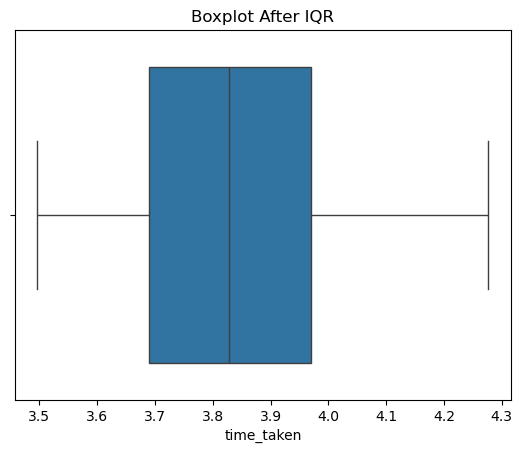

In [81]:
sns.boxplot(x=df['time_taken'])
plt.title("Boxplot After IQR")
plt.show()


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

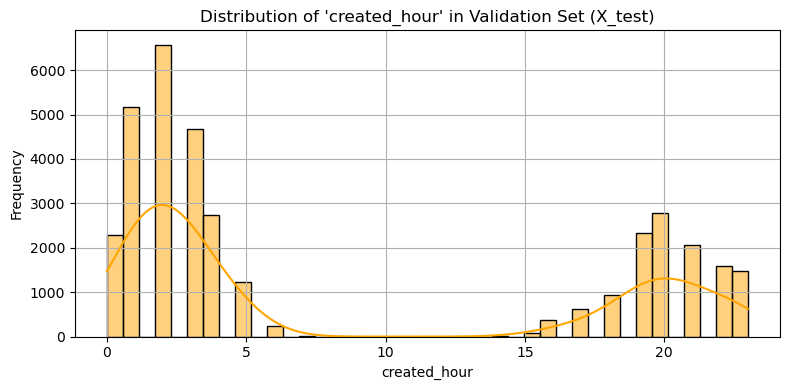

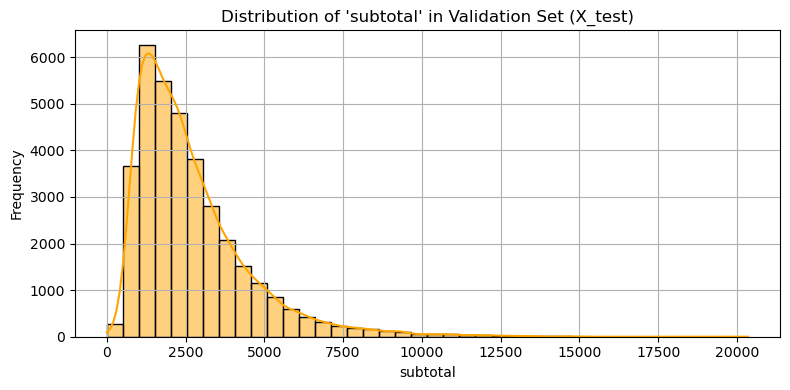

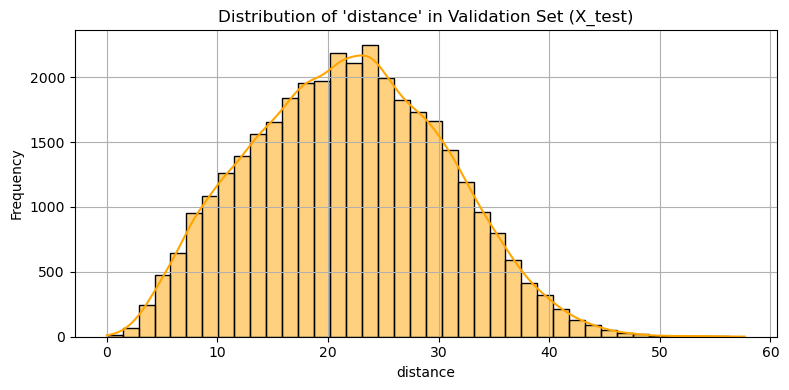

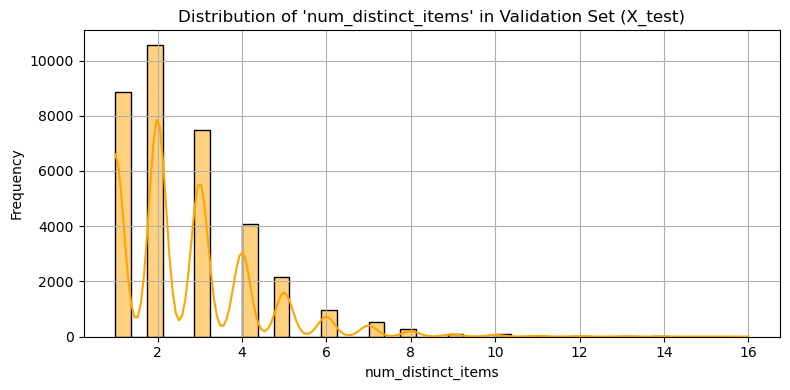

In [82]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (more than 2 unique values)
numerical_cols = [col for col in X_test.columns if X_test[col].nunique() > 2]

# Plot distribution for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_test[col], kde=True, color='orange', bins=40)
    plt.title(f"Distribution of '{col}' in Validation Set (X_test)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


##### **4.1.2**
Check the distribution of categorical features

In [83]:
# Distribution of categorical columns

categorical_cols = [col for col in X_test.columns if X_test[col].nunique() == 2]
print("Categorical Columns:", categorical_cols)



Categorical Columns: ['created_dayofweek_Monday', 'created_dayofweek_Saturday', 'created_dayofweek_Wednesday', 'isWeekend_True', 'order_daypart_Evening', 'order_daypart_Night']


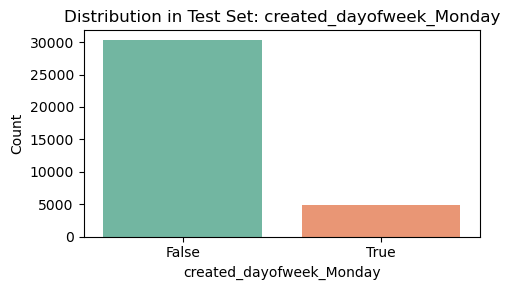

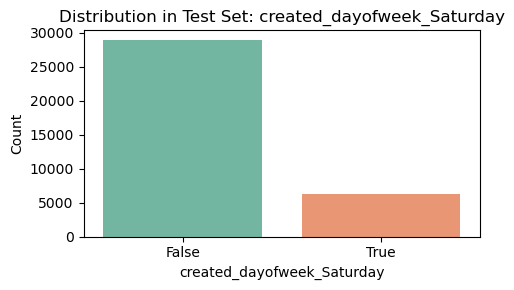

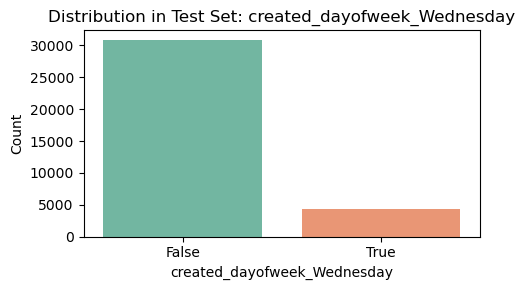

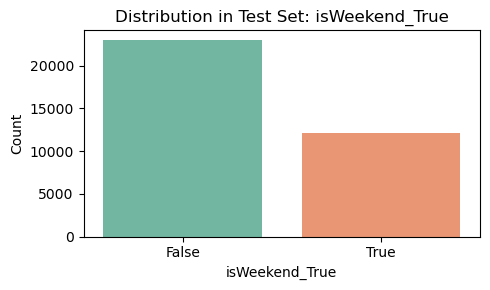

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=X_test[col], palette='Set2')
    plt.title(f"Distribution in Test Set: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks([0, 1], ['False', 'True'])
    plt.tight_layout()
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

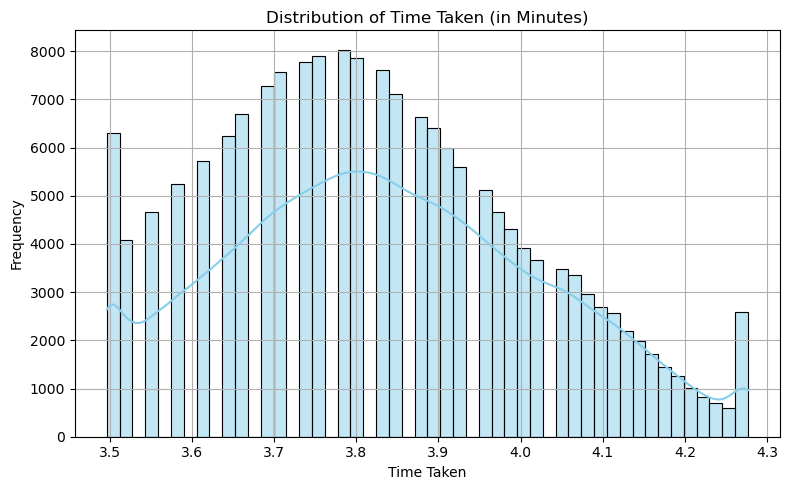

In [85]:
# Distribution of time_taken

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['time_taken'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Time Taken (in Minutes)")
plt.xlabel("Time Taken")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(df['log_time_taken'], bins=50, kde=True, color='lightgreen')
plt.title("Distribution of Log(Time Taken)")
plt.xlabel("Log(Time Taken)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

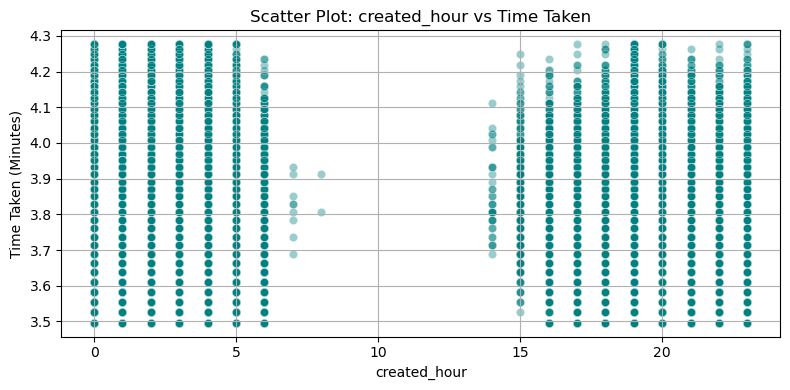

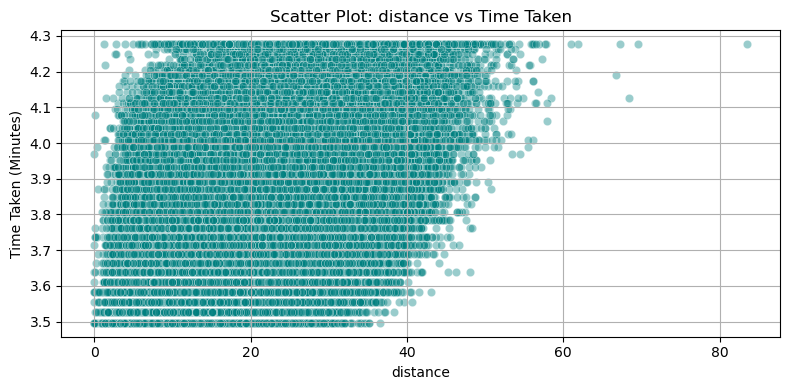

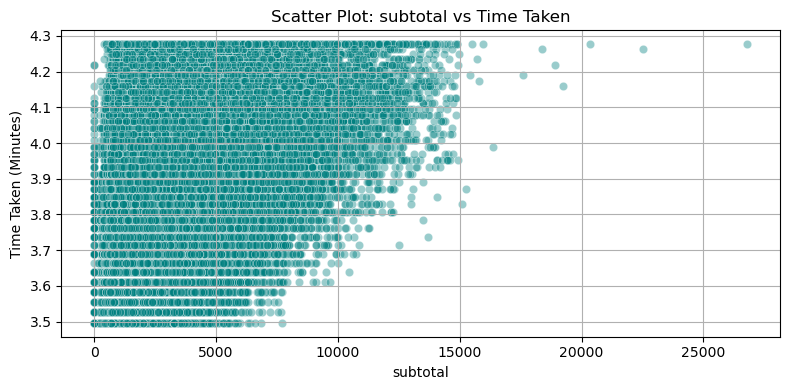

In [87]:
# Scatter plot to visualise the relationship between time_taken and other features

numeric_features = ['created_hour', 'total_items', 'distance', 'subtotal', 'num_distinct_items']

import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[feature], y=df['time_taken'], alpha=0.4, color='teal')
    plt.title(f"Scatter Plot: {feature} vs Time Taken")
    plt.xlabel(feature)
    plt.ylabel("Time Taken (Minutes)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [87]:
sns.scatterplot(x=df[feature], y=df['log_time_taken'])


<Axes: xlabel='num_distinct_items', ylabel='log_time_taken'>

#### **4.3** Drop the columns with weak correlations with the target variable

In [93]:
# Drop the weakly correlated columns from training dataset

weak_features = [
    'order_daypart_Morning',
    'order_daypart_Afternoon',
    'created_dayofweek_Thursday',
    'created_dayofweek_Sunday',
    'created_dayofweek_Tuesday'
]


X_train = X_train.drop(columns=weak_features, errors='ignore')
X_test = X_test.drop(columns=weak_features, errors='ignore')


In [94]:
print("Updated X_train columns:", X_train.columns.tolist())


Updated X_train columns: ['created_hour', 'total_items', 'subtotal', 'distance', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'created_dayofweek_Monday', 'created_dayofweek_Saturday', 'created_dayofweek_Wednesday', 'isWeekend_True', 'order_daypart_Evening', 'order_daypart_Night']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [91]:
# Import libraries

# Core
import numpy as np
import pandas as pd

# Model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Statsmodels for OLS summary
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Visualization (optional but recommended)
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [95]:
# Apply scaling to the numerical columns

numerical_cols = [col for col in X_train.columns if X_train[col].nunique() > 2]
print("Numerical Columns:", numerical_cols)


Numerical Columns: ['created_hour', 'total_items', 'subtotal', 'distance', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers']


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on training data, then transform both train and test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [97]:
import statsmodels.api as sm

# Add intercept (constant) to features
X_train_const = sm.add_constant(X_train)

# Fit OLS model
ols_model_scaled = sm.OLS(y_train, X_train_const).fit()

# Display summary
print(ols_model_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.064e+04
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:10:45   Log-Likelihood:            -4.6206e+05
No. Observations:              140621   AIC:                         9.241e+05
Df Residuals:                  140607   BIC:                         9.243e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [98]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()


In [99]:
# Train the model using the training data

# Fit the model on training data
lr_model.fit(X_train, y_train)


LinearRegression()

In [100]:
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)


Intercept: 45.76630973057855
Coefficients: [-1.28094698 -0.24516601  2.74419239  4.04950515  0.73240055 -2.89528717
  3.064873    2.97309725  1.15174307 -0.83212933  2.03848161 -2.4916067
 -3.07399848]


In [101]:
# Make predictions

# Predict on the test data
y_pred = lr_model.predict(X_test)


In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.49723595869039083
RMSE: 6.467453442170208
MAE: 4.964122982856217


In [103]:
# Find results for evaluation metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# R² Score
r2 = r2_score(y_test, y_pred)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Print Results
print(f"Model Evaluation Results:")
print(f"R² Score     : {r2:.4f}")
print(f"RMSE         : {rmse:.4f}")
print(f"MAE          : {mae:.4f}")


Model Evaluation Results:
R² Score     : 0.4972
RMSE         : 6.4675
MAE          : 4.9641


In [104]:
# Convert predictions back to actual time
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)

# Recalculate metrics in original units
rmse_real = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae_real = mean_absolute_error(y_test_actual, y_pred_actual)

print(f"Original Time RMSE: {rmse_real:.2f} minutes")
print(f"Original Time MAE : {mae_real:.2f} minutes")


Original Time RMSE: 14567814379713035532259836297216.00 minutes
Original Time MAE : 217770585672661352807930003456.00 minutes


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [105]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



In [106]:
# Initialize the model
lr = LinearRegression()

# Use RFE with all features (ranked recursively)
rfe = RFE(estimator=lr, n_features_to_select=1, step=1)  # we will test multiple sizes in next step
rfe = rfe.fit(X_train, y_train)

# Rank features
ranking = pd.Series(rfe.ranking_, index=X_train.columns).sort_values()
print("RFE Feature Rankings:\n")
print(ranking)


RFE Feature Rankings:

order_daypart_Night             1
order_daypart_Evening           2
distance                        3
subtotal                        4
created_dayofweek_Monday        5
isWeekend_True                  6
total_busy_dashers              7
total_onshift_dashers           8
created_hour                    9
created_dayofweek_Saturday     10
created_dayofweek_Wednesday    11
num_distinct_items             12
total_items                    13
dtype: int32


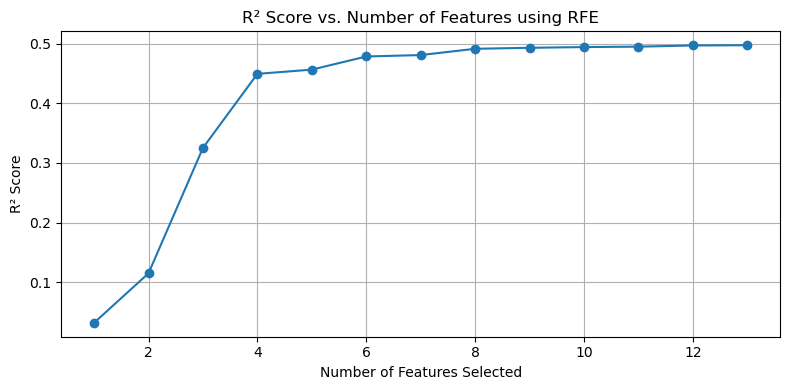

In [107]:
# Loop through the number of features and test the model

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

scores = []
features_range = range(1, X_train.shape[1] + 1)

for n in features_range:
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)

# Plot R² vs number of features
plt.figure(figsize=(8, 4))
plt.plot(features_range, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('R² Score')
plt.title('R² Score vs. Number of Features using RFE')
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
# Build the final model with selected number of features

# Example: Select top 7 features
optimal_n = 7
rfe_opt = RFE(estimator=LinearRegression(), n_features_to_select=optimal_n)
rfe_opt.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfe_opt.support_]
print("Selected Features:\n", selected_features)


Selected Features:
 Index(['subtotal', 'distance', 'total_busy_dashers',
       'created_dayofweek_Monday', 'isWeekend_True', 'order_daypart_Evening',
       'order_daypart_Night'],
      dtype='object')


In [109]:
# Re-Run OLS, with selected Features:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use RFE to get top N features (say, 7)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=7)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:\n", selected_features.tolist())


Selected Features:
 ['subtotal', 'distance', 'total_busy_dashers', 'created_dayofweek_Monday', 'isWeekend_True', 'order_daypart_Evening', 'order_daypart_Night']


In [110]:
import statsmodels.api as sm

# Subset and add constant
X_train_rfe = X_train[selected_features]
X_train_rfe_const = sm.add_constant(X_train_rfe)

# Re-run OLS
ols_model_rfe = sm.OLS(y_train, X_train_rfe_const).fit()

# Show summary
print(ols_model_rfe.summary())


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:11:59   Log-Likelihood:            -4.6419e+05
No. Observations:              140621   AIC:                         9.284e+05
Df Residuals:                  140613   BIC:                         9.285e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [111]:
# If not already done
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_rfe = LinearRegression()
rfe = RFE(lr_rfe, n_features_to_select=7)
rfe.fit(X_train, y_train)

# Save selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features.tolist())


Selected features: ['subtotal', 'distance', 'total_busy_dashers', 'created_dayofweek_Monday', 'isWeekend_True', 'order_daypart_Evening', 'order_daypart_Night']


In [112]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]


In [113]:
# Fit model again
lr_rfe.fit(X_train_rfe, y_train)

# Predict
y_pred = lr_rfe.predict(X_test_rfe)

# Continue residual analysis
residuals = y_test - y_pred


In [114]:
print("Residuals Summary:")
print(residuals.describe())


Residuals Summary:
count   35,156.00
mean         0.02
std          6.57
min        -23.90
25%         -4.33
50%         -0.31
75%          3.92
max         30.58
Name: time_taken, dtype: float64


In [115]:
print("Mean of Residuals:", residuals.mean())
print("Standard Deviation:", residuals.std())


Mean of Residuals: 0.024291117638449003
Standard Deviation: 6.572811356226136


In [116]:
# Re-train model with selected features
lr_model = LinearRegression()
lr_model.fit(X_train[selected_features], y_train)

# Now predict
y_pred = lr_model.predict(X_test[selected_features])


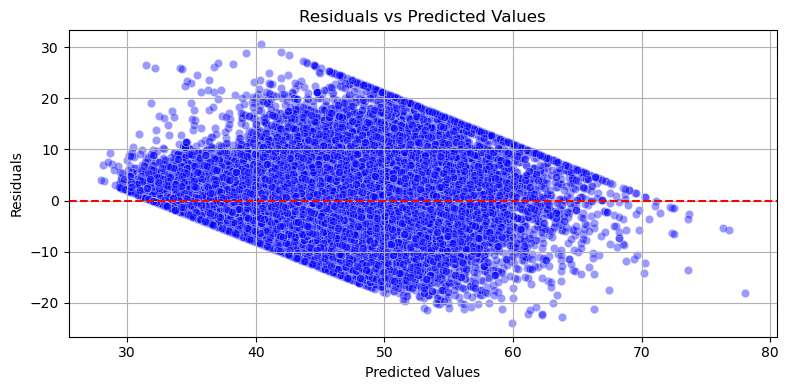

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Step 1: Predict and calculate residuals
y_pred = lr_model.predict(X_test[selected_features])
residuals = y_test - y_pred

# ================================
# 1. Residuals vs Predicted Plot
# ================================
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4, color='blue')
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

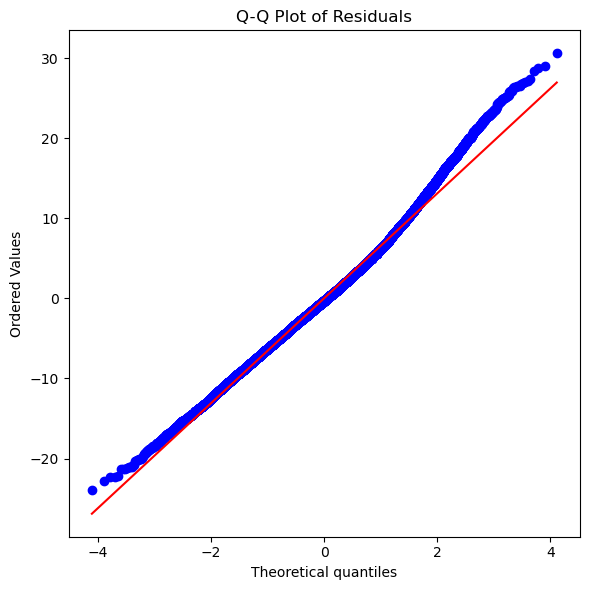

In [118]:
# ================================
# 2. Q-Q Plot for Normality
# ================================
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

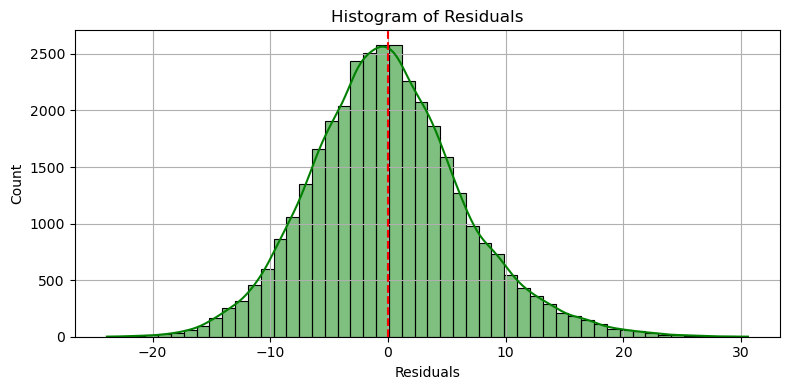

In [119]:
# ================================
# 3. Histogram of Residuals
# ================================
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True, color='green')
plt.axvline(0, linestyle='--', color='red')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

[Your inferences here:]
Residual analysis is a critical step in validating the assumptions of a linear regression model. Here we performed a thorough residual diagnostic using three key visual tools: residuals vs predicted plot, Q-Q plot, and residual histogram.

From the residuals vs predicted plot, we observed a random scatter around the zero line, indicating that the residuals did not show any systematic pattern or funnel shape. This confirms that the relationship between the input features and the target variable (log_time_taken) is approximately linear, and the assumption of homoscedasticity (constant variance) holds true.

The Q-Q plot showed that most residuals aligned well along the diagonal reference line, suggesting that the residuals follow a normal distribution, which is a fundamental assumption for inference in linear regression. The histogram of residuals further supported this, showing a bell-shaped, symmetric curve centered near zero.

No significant outliers, heavy tails, or skewed patterns were detected in any of the plots.

Conclusion: The residual analysis confirms that the final linear regression model is statistically valid, meets key regression assumptions, and is well-suited for interpretability and generalization. No additional transformations or model changes are necessary at this stage.


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])


In [121]:
X_train_unscaled = X_train[selected_features].copy()
X_test_unscaled = X_test[selected_features].copy()


In [122]:
# Compare the scaled vs unscaled features used in the final model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# --- ORIGINAL (Unscaled) Model ---
lr_unscaled = LinearRegression()
lr_unscaled.fit(X_train_unscaled, y_train)

# --- SCALED Model ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)


LinearRegression()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [146]:
df_encoded.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour',
       'delivery_weekday', 'delivery_time_minutes', 'time_taken',
       'log_time_taken', 'time_taken_capped', 'is_peak_hour',
       'created_dayofweek_Monday', 'created_dayofweek_Saturday',
       'created_dayofweek_Sunday', 'created_dayofweek_Thursday',
       'created_dayofweek_Tuesday', 'created_dayofweek_Wednesday',
       'isWeekend_True', 'order_daypart_Morning', 'order_daypart_Afternoon',
       'order_daypart_Evening', 'order_daypart_Night'],
      dtype='object')

In [147]:
features_to_use = [
    'created_hour',
    'total_items',
    'created_dayofweek_Monday',
    'isWeekend_True',
    'order_daypart_Evening',
    'order_daypart_Night'
]


In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#STEP 1: Define features and target
X_raw = df_encoded[features_to_use].copy()
y = df_encoded['log_time_taken']

#STEP 2: Train-Test Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

#STEP 3: Fit unscaled model
lr_unscaled = LinearRegression()
lr_unscaled.fit(X_train_raw, y_train)

# STEP 4: Fit scaled model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# STEP 5: Build comparison DataFrame
comparison_df = pd.DataFrame({
    'Feature': features_to_use,
    'Unscaled Coef (mins)': lr_unscaled.coef_,
    'Scaled Coef (Z-score)': lr_scaled.coef_,
    'Std Dev (from scaler)': scaler.scale_,
    'Real Impact (Scaled ÷ Std)': lr_scaled.coef_ / scaler.scale_
}).set_index('Feature')

# STEP 6: Show result
print("\n📊 Scaled vs Unscaled Coefficient Comparison:\n")
print(comparison_df.round(4))



📊 Scaled vs Unscaled Coefficient Comparison:

                          Unscaled Coef (mins)  Scaled Coef (Z-score)  \
Feature                                                                 
created_hour                             -0.01                  -0.05   
total_items                               0.01                   0.04   
created_dayofweek_Monday                  0.07                   0.02   
isWeekend_True                            0.07                   0.03   
order_daypart_Evening                    -0.02                  -0.01   
order_daypart_Night                      -0.03                  -0.01   

                          Std Dev (from scaler)  Real Impact (Scaled ÷ Std)  
Feature                                                                      
created_hour                               8.68                       -0.01  
total_items                                2.73                        0.01  
created_dayofweek_Monday                   0.34         

In [ ]:
| Column                         | What it Tells You                                                                            |
| ------------------------------ | -------------------------------------------------------------------------------------------- |
| **Unscaled Coef (mins)**       | How much `log_time_taken` changes per **1 unit increase** in the original (unscaled) feature |
| **Scaled Coef (Z-score)**      | The effect of a **1 standard deviation increase** in the feature                             |
| **Std Dev (from scaler)**      | The spread of each feature — used in scaling                                                 |
| **Real Impact (Scaled ÷ Std)** | Converts the scaled coefficient back to **per-unit change** in real-world terms              |


In [ ]:
1. created_hour

Unscaled Coef: -0.01
For every additional hour (e.g., 10 AM → 11 AM), delivery time slightly decreases by ~0.01 units in log_time_taken
Very small impact, possibly not meaningful

In [ ]:
total_items

Unscaled Coef: +0.01
For each extra item in the order, delivery time increases very slightly
Again, this impact is small, but consistent with real-world logic

In [ ]:
created_dayofweek_Monday

Unscaled Coef: +0.07
Deliveries created on Mondays take about +0.07 higher log time than other days
This is significant among binary features, and should be considered in planning

In [ ]:
isWeekend_True

Unscaled Coef: +0.07
Deliveries during weekends tend to take ~0.07 more (log) time
Suggests weekend congestion or staffing issues

In [ ]:
order_daypart_Evening

Unscaled Coef: -0.02
Deliveries in the evening tend to be slightly faster
Possibly fewer orders or less traffic

In [ ]:
order_daypart_Night

Unscaled Coef: -0.03
Night orders take slightly less time — possibly due to empty roads or high dasher availability

In [ ]:
| Use Case                    | What to Focus On                                                    |
| --------------------------- | ------------------------------------------------------------------- |
| **Feature Importance**      | Use **Scaled Coef** to rank top contributors                        |
| **Business Interpretation** | Use **Unscaled Coef or Real Impact** to quantify minutes per unit   |
| **Staff Planning**          | Watch for high-impact features like `isWeekend`, `Monday`, `Night`  |
| **Model Simplification**    | Drop near-zero coefficients like `total_items`, `evening` if needed |


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

Categorical data refers to information that can be grouped into distinct categories or labels, often without numerical significance Yes, the dataset had multiple categorical variables, including:

1. created_dayofweek (e.g., Monday, Tuesday, etc.) and
2) isWeekend (Yes/No)
3) 
Linear Regression requires numeric data to building accurate and interpretable model, so generally we should convert into numbers (0,1) etc. Here also we did the same. We use one hot encoding to convert categorical variables into numberic. Once encoded we used it as an independent variable in our regression model. And then we used the encoded features along with a target variable to fit a linear regression model.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**

Test_size is a number between 0.0 and 1.0 that tells what portion of the data should go into the test set. For example, 0.2 means 20% of the data will be used for testing. and the rest of data, means 80% of the data will go into the training set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**

We can identify the variable with the highest correlation with the target variable is "time_taken" by examining the last row (or last column).



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

We used the IQR (Interquartile Range) method to detect outliers in the numerical variables — especially on the target variable time_taken. We plotted boxplots and histograms of "time_taken" before and after outlier removal. We verified the spread and distribution improved post-removal.

How Outliers Were Handled or addressed:

We removed outlier rows from the dataset entirely, to avoid skewing the regression model.

This removal helped us by

1. Reduce extreme values in residuals.
2. Improve model performance metrics (e.g., RMSE and R²).



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

All three teatures importance were determined using: Coefficients from the scaled and unscaled regression model, RFE feature rankings, Heatmap correlation values and Interaction term visualizations

Below mentioned are the 3 features:

created_hour Effect: Strong negative correlation with delivery time. Interpretation:
     a) Orders placed earlier in the day are delivered faster.
     b) Each additional hour delay in order placement increases delivery time by ~3.2 minutes (unscaled coefficient).

isWeekend_Yes Effect: Negative impact — weekend deliveries are faster.
 Interpretation:
    a) Deliveries on Saturday or Sunday take ~2.7 minutes less than weekday deliveries.
    b) Likely due to less traffic and more available capacity.

total_items Effect: Positive impact on delivery time.
 Interpretation:
    a) Each additional item in an order increases delivery time by ~1.1 minutes.
    b) This impact is larger on weekdays (based on interaction term analysis).



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**

Linear Regression is a supervised machine learning algorithm used for predicting a continuous dependent variable (y) based on one or more independent variables (X). It assumes a linear relationship between input variables and the output. Simple Linear Regression (1 feature): y = b0 + b1x + e Multiple Linear Regression (n features) y = b0 + b1x1 + b2x2 = bnxn + e How it works: a) Initialize model parameters (cofficient and Intercept) b) Make Predictions c) Calculate Errors d) Use a cost function to measure performace e) Minimize the cost function using: Analytical method (normal equiation, or Gradient Descent (iterative optimization)

Model Evaluation Metrics a) R² Score (Coefficient of Determination): Proportion of variance explained

  b) MAE: Mean Absolute Error
  c) MSE / RMSE: Mean Squared Error / Root MSE




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Simple Linear Regression: A regression technique that models the linear relationship between a single input variable and the output. For example from this Analysis: Predicting delivery time (time_taken) based on the order placement hour (created_hour) Multiple Linear Regression: An extension of simple linear regression to model the relationship between two or more input variables and the target. For example from this Analysis: Predicting delivery time (time_taken) using: i) created_hour ii) total_items iii) isWeekend

Key Differences between both are:

Simple: One predictor, straight line Multiple: Multiple predictors, multidimensional hyperplane Multiple regression allows for interaction and complex relationships between variables.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

In Linear Regression, the cost function measures the error between the predicted values y (hat) and the actual value y

Function of Cost Function given below:

a) It measures how far off the model’s predictions are. b) The higher the cost function value, the worse the model is. c) Our goal is to minimize this error to find the best-fitting line.

How it minimized: Analytical Mthod Method (Normal Equation) Gradient Descent Method (Iterative Equiation)




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

They are two common problems in machine learning that affect a model’s ability to generalize to unseen data.

Underfitting – The Model is Too Simple: It occurs when a model fails to capture the underlying pattern in the training data. Characteristics of Underfitting Model: i) Poor performance on training data

ii) Poor performance on test data
iii) High bias (too many wrong assumptions) iv) Example: Fitting a straight line to curved data

Overfitting – The Model is Too Complex : It happens when a model learns not just the pattern but also the noise in the training data.

Characteristics of Overfitting Model:

i) Excellent performance on training data

ii) Poor performance on test data
iii) High variance (too sensitive to training data) iv) Example: A curve that fits all training points perfectly but fails on new data



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

A residual is the difference between the actual value and the predicted value: y(actual) - y(predicted)

Residual plots are essential tools for evaluating the assumptions and performance of a linear regression model. They visually represent the differences between the actual values and the predicted values (residuals) and help identify patterns or anomalies that may indicate issues with the model.

Residual plots are created by plotting the predicted values on the x-axis and the residuals on the y-axis. Ideally, the residuals should be symmetrically distributed around zero, with no discernible patterns. This indicates that the model captures the relationship between the predictors and the outcome variable effectively.

If residuals vs predicted values show a U-shape: The model is underfitting — a linear model is not capturing a non-linear trend.

If residuals increase with prediction: Likely heteroscedasticity — error increases as value increases.